# VSOC SURVEY

In [1]:
# Packages
import numpy as np
import pandas as pd 
import seaborn as sns
import json
import warnings
import requests
from datetime import datetime
import os
import re
from IPython.display import HTML, display, clear_output
from ipywidgets import *
import tabulate
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# Disable warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [2]:
#os.getcwd()
dataset = pd.read_csv("data_VSOC.csv", sep=";", encoding='utf-8')

In [3]:
dataset.head()

,CASE,SERIAL,REF,QUESTNNR,MODE,STARTED,B101,B105_01,B106_01,R102,...,TIME_SUM,MAILSENT,LASTDATA,FINISHED,Q_VIEWER,LASTPAGE,MAXPAGE,MISSING,MISSREL,TIME_RSI
0,14,NaN,NaN,base,interview,10/06/2024 12:05,2,Automotive IT Security Researcher,2,1,...,171,NaN,10/06/2024 12:08,1,0,3,3,50,9,2.37
1,18,NaN,NaN,base,interview,10/06/2024 13:16,2,automotive security research assistant,4,1,...,1512,NaN,10/06/2024 14:58,1,0,3,3,31,3,0.14
2,27,NaN,NaN,base,interview,11/06/2024 13:53,3,security analyst; researcher,8,3,...,874,NaN,11/06/2024 14:13,1,0,3,3,39,5,0.58
3,34,NaN,NaN,base,interview,11/06/2024 22:04,3,SOC Specialist,10,2,...,245,NaN,11/06/2024 22:08,1,0,3,3,29,23,2.34
4,42,NaN,NaN,base,interview,12/06/2024 03:54,2,"Security Manager ,Analyst,Architect",2,2,...,287,NaN,12/06/2024 03:59,1,0,3,3,44,11,2.24


In [4]:
# Valid surveys
len(dataset)

11

## Survey Participant Job

In [5]:
job = dataset["B105_01"].value_counts()
job

Automotive IT Security Researcher                                                        1
automotive security research assistant                                                   1
security analyst; researcher                                                             1
SOC Specialist                                                                           1
Security Manager ,Analyst,Architect                                                      1
Sales Engineering Manager EMEA (pre-sales), Solution Architect, De-Escalation Manager    1
Senior Product Safety and Cybersecurity Engineer                                         1
Automotive Security Operation Center Analyst                                             1
Cybersecurtiy engineer; Cybersecurity consultant                                         1
Chief Engineer - Cybersecurity                                                           1
VSOC Analyst                                                                             1

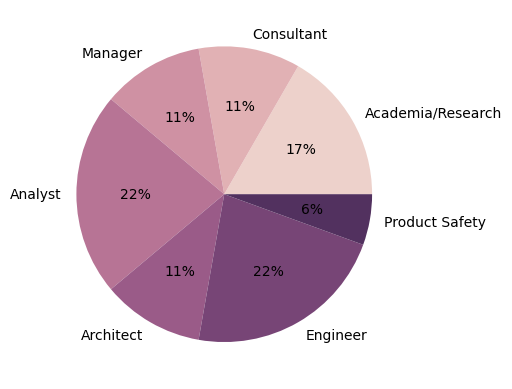

In [6]:
colors = sns.cubehelix_palette(8)
y = np.array([3, 2, 2, 4, 2, 4, 1])
mylabels = ["Academia/Research", "Consultant", "Manager", "Analyst", "Architect", "Engineer", "Product Safety"]

plt.pie(y, labels = mylabels, colors = colors, autopct='%.0f%%')
plt.savefig("vsoc_role.svg",bbox_inches='tight')
plt.show()

## Survey Participant Experience

In [7]:
exp = dataset["B106_01"].value_counts()
exp

2      3
10     2
4      1
8      1
3      1
5      1
2,5    1
15     1
Name: B106_01, dtype: int64

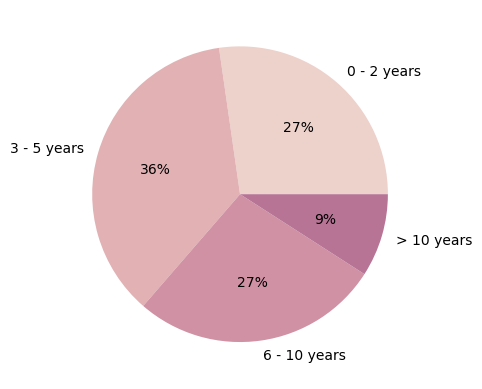

In [8]:
y = np.array([3, 4, 3, 1])
mylabels = ["0 - 2 years", "3 - 5 years", "6 - 10 years", "> 10 years"]

plt.pie(y, labels = mylabels, colors = colors, autopct='%.0f%%')
plt.savefig("vsoc_exp.svg",bbox_inches='tight')
plt.show()

## Survey Participant Age

In [9]:
age = dataset["B101"].value_counts()
age

2    5
3    3
4    3
Name: B101, dtype: int64

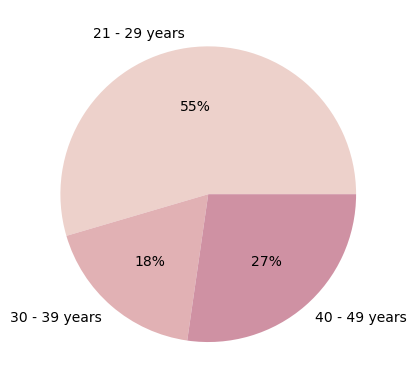

In [10]:
y = np.array([6, 2, 3])
mylabels = ["21 - 29 years", "30 - 39 years", "40 - 49 years"]


plt.pie(y, labels = mylabels, colors = colors, autopct='%.0f%%')
plt.savefig("vsoc_age.svg",bbox_inches='tight')
plt.show()

## VSOC Roles

#### Technical

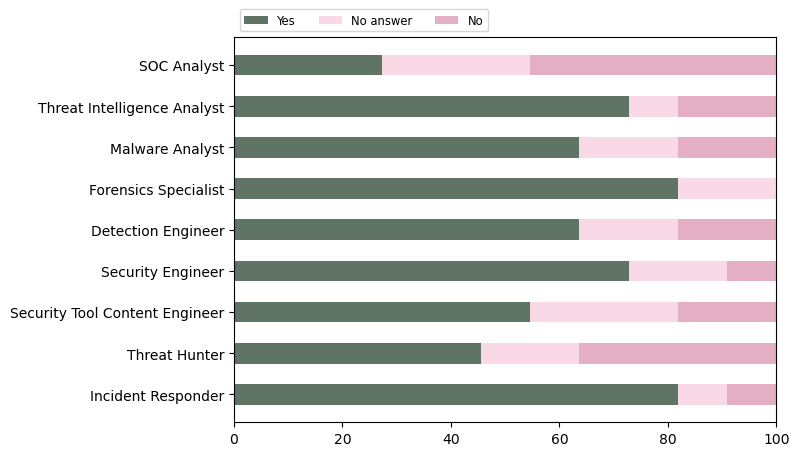

In [11]:
roles = ("SOC Analyst" , "Threat Intelligence Analyst", "Malware Analyst" , "Forensics Specialist" , "Detection Engineer" , "Security Engineer" , "Security Tool Content Engineer", "Threat Hunter" , "Incident Responder")
roles_counts = {
    'Yes': np.array([dataset["R102"].value_counts(normalize=True)[1.0], 
                    dataset["R105"].value_counts(normalize=True)[1.0], 
                    dataset["R106"].value_counts(normalize=True)[1.0], 
                    dataset["R107"].value_counts(normalize=True)[1.0], 
                    dataset["R108"].value_counts(normalize=True)[1.0], 
                    dataset["R109"].value_counts(normalize=True)[1.0], 
                    dataset["R110"].value_counts(normalize=True)[1.0], 
                    dataset["R111"].value_counts(normalize=True)[1.0], 
                    dataset["R113"].value_counts(normalize=True)[1.0]]),
    'No answer': np.array([dataset["R102"].value_counts(normalize=True)[2.0], 
                    dataset["R105"].value_counts(normalize=True)[2.0], 
                    dataset["R106"].value_counts(normalize=True)[2.0], 
                    dataset["R107"].value_counts(normalize=True)[2.0], 
                    dataset["R108"].value_counts(normalize=True)[2.0], 
                    dataset["R109"].value_counts(normalize=True)[2.0], 
                    dataset["R110"].value_counts(normalize=True)[2.0], 
                    dataset["R111"].value_counts(normalize=True)[2.0], 
                    dataset["R113"].value_counts(normalize=True)[2.0]]),
    'No': np.array([dataset["R102"].value_counts(normalize=True)[3.0], 
                    dataset["R105"].value_counts(normalize=True)[3.0], 
                    dataset["R106"].value_counts(normalize=True)[3.0], 
                    0, 
                    dataset["R108"].value_counts(normalize=True)[3.0], 
                    dataset["R109"].value_counts(normalize=True)[3.0], 
                    dataset["R110"].value_counts(normalize=True)[3.0], 
                    dataset["R111"].value_counts(normalize=True)[3.0], 
                    dataset["R113"].value_counts(normalize=True)[3.0]])
}
width = 0.5  # the width of the bars: can also be len(x) sequence
category_colors = ["#5F7464", "#FAD9E6", "#E4AEC5"]
#category_colors = ["grey", "red", "cyan"]


fig, ax = plt.subplots(figsize=(7, 5))
ax.invert_yaxis()
bottom = np.zeros(9)
colorcount = 0

for role, roles_count in roles_counts.items():
    p = ax.barh(roles, roles_count*100, width, label=role, left=bottom, color=category_colors[colorcount])
    colorcount = 0 if colorcount == 2 else colorcount+1
    bottom += roles_count*100

ax.legend(ncols=3, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

plt.savefig("soc_roles_tech.svg",bbox_inches='tight')
plt.show()


#### Managment

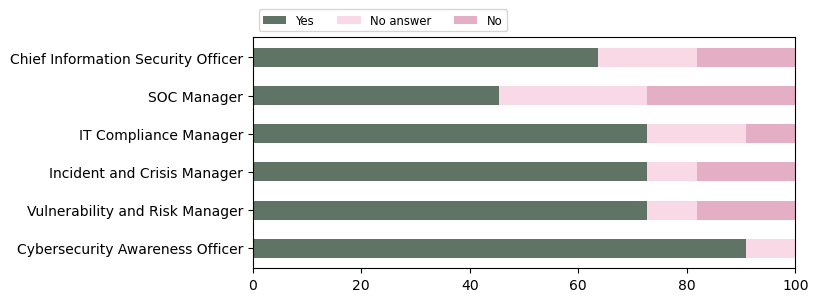

In [12]:
roles = ("Chief Information Security Officer" , "SOC Manager" , "IT Compliance Manager" , "Incident and Crisis Manager" , "Vulnerability and Risk Manager", "Cybersecurity Awareness Officer")
roles_counts = {
    'Yes': np.array([dataset["R115"].value_counts(normalize=True)[1.0], 
                    dataset["R116"].value_counts(normalize=True)[1.0], 
                    dataset["R117"].value_counts(normalize=True)[1.0], 
                    dataset["R118"].value_counts(normalize=True)[1.0], 
                    dataset["R119"].value_counts(normalize=True)[1.0],
                    dataset["R126"].value_counts(normalize=True)[1.0]]),
    'No answer': np.array([dataset["R115"].value_counts(normalize=True)[2.0], 
                    dataset["R116"].value_counts(normalize=True)[2.0], 
                    dataset["R117"].value_counts(normalize=True)[2.0], 
                    dataset["R118"].value_counts(normalize=True)[2.0], 
                    dataset["R119"].value_counts(normalize=True)[2.0],
                    dataset["R126"].value_counts(normalize=True)[2.0]]),
    'No': np.array([dataset["R115"].value_counts(normalize=True)[3.0], 
                    dataset["R116"].value_counts(normalize=True)[3.0], 
                    dataset["R117"].value_counts(normalize=True)[3.0], 
                    dataset["R118"].value_counts(normalize=True)[3.0], 
                    dataset["R119"].value_counts(normalize=True)[3.0],
                    0]),
}
width = 0.5  # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(7, 3))
ax.invert_yaxis()
ax.margins(x=0)
bottom = np.zeros(6)
colorcount = 0
category_colors = ["#5F7464", "#FAD9E6", "#E4AEC5"]

for role, roles_count in roles_counts.items():
    p = ax.barh(roles, roles_count*100, width, label=role, left=bottom, color=category_colors[colorcount])
    colorcount = 0 if colorcount == 2 else colorcount+1
    bottom += roles_count*100

ax.legend(ncols=3, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

plt.savefig("soc_roles_manag.svg",bbox_inches='tight')
plt.show()

#### Consulting

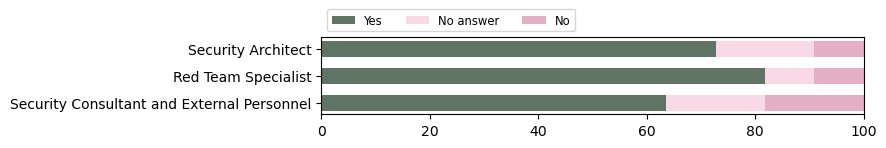

In [13]:
roles = ("Security Architect" , "Red Team Specialist", "Security Consultant and External Personnel")
roles_counts = {
    'Yes': np.array([dataset["R121"].value_counts(normalize=True)[1.0], 
                    dataset["R112"].value_counts(normalize=True)[1.0],
                   dataset["R122"].value_counts(normalize=True)[1.0]]),
    'No answer': np.array([dataset["R121"].value_counts(normalize=True)[2.0], 
                    dataset["R112"].value_counts(normalize=True)[2.0],
                          dataset["R122"].value_counts(normalize=True)[2.0]]),
    'No': np.array([dataset["R121"].value_counts(normalize=True)[3.0], 
                    dataset["R112"].value_counts(normalize=True)[3.0],
                   dataset["R122"].value_counts(normalize=True)[3.0]]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots(figsize=(7, 1))
ax.invert_yaxis()
bottom = np.zeros(3)
ax.margins(x=0)
colorcount = 0
category_colors = ["#5F7464", "#FAD9E6", "#E4AEC5"]

for role, roles_count in roles_counts.items():
    p = ax.barh(roles, roles_count*100, width, label=role, left=bottom, color=category_colors[colorcount])
    colorcount = 0 if colorcount == 2 else colorcount+1
    bottom += roles_count*100

ax.legend(ncols=3, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

plt.savefig("soc_roles_ex.svg",bbox_inches='tight')
plt.show()


### Missing Roles

In [14]:
roles_missing = dataset["R127_01"].value_counts()
roles_missing

The field for comments in "additonal comment if needed" are very small, not easily usable :D                1
There is typically no clear definition and separation of roles. Teaming always differs in organizations.    1
Name: R127_01, dtype: int64

## VSOC Tools

#### Data Collection and Management

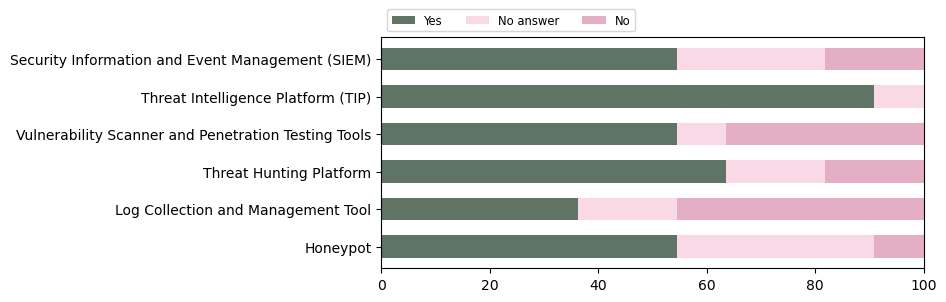

In [15]:
tools = ("Security Information and Event Management (SIEM)" , "Threat Intelligence Platform (TIP)", "Vulnerability Scanner and Penetration Testing Tools", "Threat Hunting Platform", "Log Collection and Management Tool", "Honeypot")
tools_counts = {
    'Yes': np.array([dataset["T102"].value_counts(normalize=True)[1.0], 
                    dataset["T103"].value_counts(normalize=True)[1.0],
                    dataset["T104"].value_counts(normalize=True)[1.0],
                    dataset["T105"].value_counts(normalize=True)[1.0],
                    dataset["T106"].value_counts(normalize=True)[1.0],
                    dataset["T107"].value_counts(normalize=True)[1.0]]),
    'No answer': np.array([dataset["T102"].value_counts(normalize=True)[2.0], 
                    dataset["T103"].value_counts(normalize=True)[2.0],
                    dataset["T103"].value_counts(normalize=True)[2.0],
                    dataset["T105"].value_counts(normalize=True)[2.0],
                    dataset["T106"].value_counts(normalize=True)[2.0],
                    dataset["T107"].value_counts(normalize=True)[2.0]]),
    'No': np.array([dataset["T102"].value_counts(normalize=True)[3.0], 
                    0,
                    dataset["T104"].value_counts(normalize=True)[3.0],
                    dataset["T105"].value_counts(normalize=True)[3.0],
                    dataset["T106"].value_counts(normalize=True)[3.0],
                    dataset["T107"].value_counts(normalize=True)[3.0]])
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots(figsize=(7, 3))
ax.invert_yaxis()
bottom = np.zeros(6)
ax.margins(x=0)
colorcount = 0
category_colors = ["#5F7464", "#FAD9E6", "#E4AEC5"]

for tool, tool_count in tools_counts.items():
    p = ax.barh(tools, tool_count*100, width, label=tool, left=bottom, color=category_colors[colorcount])
    colorcount = 0 if colorcount == 2 else colorcount+1
    bottom += tool_count*100

ax.legend(ncols=3, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

plt.savefig("soc_tools_data.svg",bbox_inches='tight')
plt.show()

#### Infrastructure Security

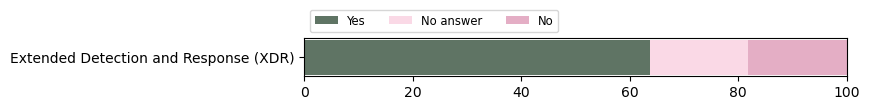

In [16]:
tools = ("Extended Detection and Response (XDR)")
tools_counts = {
    'Yes': np.array([dataset["T109"].value_counts(normalize=True)[1.0]]),
    'No answer': np.array([dataset["T109"].value_counts(normalize=True)[2.0]]),
    'No': np.array([dataset["T109"].value_counts(normalize=True)[3.0]])
}
width = 0.4  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots(figsize=(7, 0.5))
ax.invert_yaxis()
bottom = np.zeros(1)
ax.margins(x=0)
colorcount = 0
category_colors = ["#5F7464", "#FAD9E6", "#E4AEC5"]

for tool, tool_count in tools_counts.items():
    p = ax.barh(tools, tool_count*100, width, label=tool, left=bottom, color=category_colors[colorcount])
    colorcount = 0 if colorcount == 2 else colorcount+1
    bottom += tool_count*100

ax.legend(ncols=3, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

plt.savefig("soc_tools_infra.svg",bbox_inches='tight')
plt.show()

#### Network Security

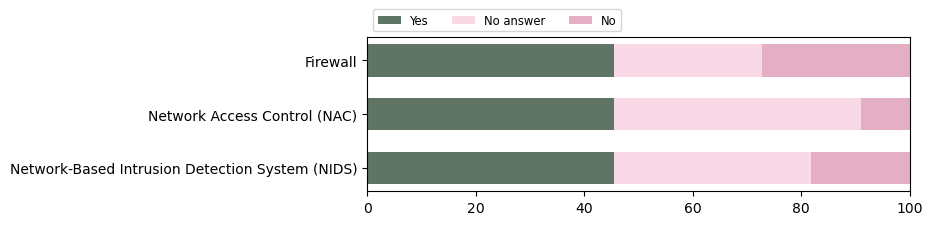

In [17]:
tools = ("Firewall", "Network Access Control (NAC)", "Network-Based Intrusion Detection System (NIDS)")
tools_counts = {
    'Yes': np.array([dataset["T111"].value_counts(normalize=True)[1.0], 
                    dataset["T112"].value_counts(normalize=True)[1.0],
                    dataset["T113"].value_counts(normalize=True)[1.0]]),
    'No answer': np.array([dataset["T111"].value_counts(normalize=True)[2.0], 
                    dataset["T112"].value_counts(normalize=True)[2.0],
                    dataset["T113"].value_counts(normalize=True)[2.0],]),
    'No': np.array([dataset["T111"].value_counts(normalize=True)[3.0], 
                    dataset["T112"].value_counts(normalize=True)[3.0],
                    dataset["T113"].value_counts(normalize=True)[3.0]])
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots(figsize=(7, 2))
bottom = np.zeros(3)
ax.invert_yaxis()
ax.margins(x=0)
colorcount = 0
category_colors = ["#5F7464", "#FAD9E6", "#E4AEC5"]

for tool, tool_count in tools_counts.items():
    p = ax.barh(tools, tool_count*100, width, label=tool, left=bottom, color=category_colors[colorcount])
    colorcount = 0 if colorcount == 2 else colorcount+1
    bottom += tool_count*100

ax.legend(ncols=3, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

plt.savefig("soc_tools_network.svg",bbox_inches='tight')
plt.show()

#### Endpoint Security

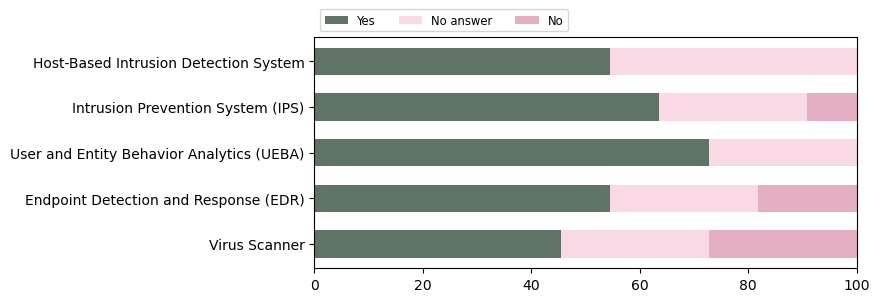

In [18]:
tools = ("Host-Based Intrusion Detection System", "Intrusion Prevention System (IPS)", "User and Entity Behavior Analytics (UEBA)", "Endpoint Detection and Response (EDR)", "Virus Scanner")
tools_counts = {
    'Yes': np.array([dataset["T116"].value_counts(normalize=True)[1.0], 
                    dataset["T117"].value_counts(normalize=True)[1.0],
                    dataset["T118"].value_counts(normalize=True)[1.0],
                    dataset["T119"].value_counts(normalize=True)[1.0],
                    dataset["T114"].value_counts(normalize=True)[1.0]]),
    'No answer': np.array([dataset["T116"].value_counts(normalize=True)[2.0], 
                    dataset["T117"].value_counts(normalize=True)[2.0],
                    dataset["T118"].value_counts(normalize=True)[2.0],
                    dataset["T119"].value_counts(normalize=True)[2.0],
                    dataset["T114"].value_counts(normalize=True)[2.0]]),
    'No': np.array([0, 
                    dataset["T117"].value_counts(normalize=True)[3.0],
                    0,
                    dataset["T119"].value_counts(normalize=True)[3.0],
                   dataset["T114"].value_counts(normalize=True)[3.0]])
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots(figsize=(7, 3))
bottom = np.zeros(5)
ax.invert_yaxis()
ax.margins(x=0)
colorcount = 0
category_colors = ["#5F7464", "#FAD9E6", "#E4AEC5"]

for tool, tool_count in tools_counts.items():
    p = ax.barh(tools, tool_count*100, width, label=tool, left=bottom, color=category_colors[colorcount])
    colorcount = 0 if colorcount == 2 else colorcount+1
    bottom += tool_count*100

ax.legend(ncols=3, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

plt.savefig("soc_tools_end.svg",bbox_inches='tight')
plt.show()

#### Application Security

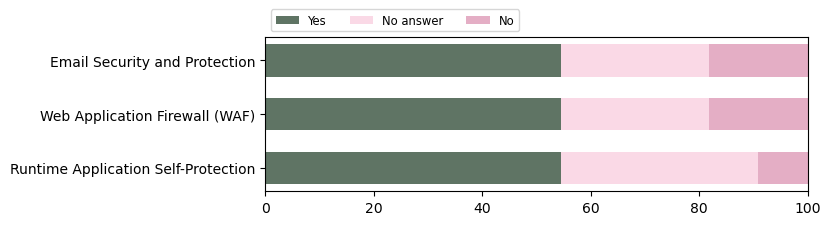

In [19]:
tools = ("Email Security and Protection", "Web Application Firewall (WAF)", "Runtime Application Self-Protection")
tools_counts = {
    'Yes': np.array([dataset["T121"].value_counts(normalize=True)[1.0], 
                    dataset["T122"].value_counts(normalize=True)[1.0],
                    dataset["T123"].value_counts(normalize=True)[1.0]]),
    'No answer': np.array([dataset["T121"].value_counts(normalize=True)[2.0], 
                    dataset["T122"].value_counts(normalize=True)[2.0],
                    dataset["T123"].value_counts(normalize=True)[2.0]]),
    'No': np.array([dataset["T121"].value_counts(normalize=True)[3.0], 
                    dataset["T122"].value_counts(normalize=True)[3.0],
                    dataset["T123"].value_counts(normalize=True)[3.0]])
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots(figsize=(7, 2))
bottom = np.zeros(3)
ax.invert_yaxis()
ax.margins(x=0)
colorcount = 0
category_colors = ["#5F7464", "#FAD9E6", "#E4AEC5"]

for tool, tool_count in tools_counts.items():
    p = ax.barh(tools, tool_count*100, width, label=tool, left=bottom, color=category_colors[colorcount])
    colorcount = 0 if colorcount == 2 else colorcount+1
    bottom += tool_count*100

ax.legend(ncols=3, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

plt.savefig("soc_tools_appl.svg",bbox_inches='tight')
plt.show()

#### Incident Analysis

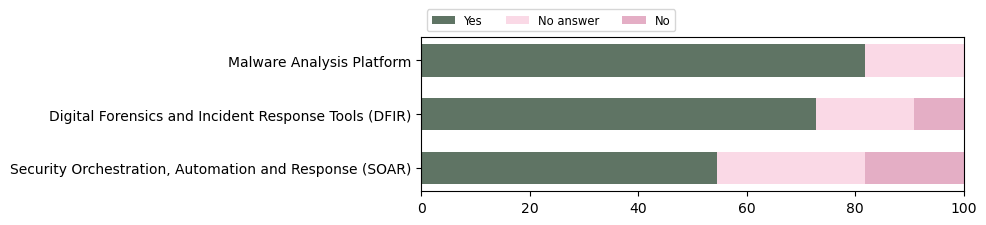

In [20]:
tools = ("Malware Analysis Platform", "Digital Forensics and Incident Response Tools (DFIR)", "Security Orchestration, Automation and Response (SOAR)")
tools_counts = {
    'Yes': np.array([dataset["T125"].value_counts(normalize=True)[1.0], 
                    dataset["T126"].value_counts(normalize=True)[1.0],
                    dataset["T127"].value_counts(normalize=True)[1.0]]),
    'No answer': np.array([dataset["T125"].value_counts(normalize=True)[2.0], 
                    dataset["T126"].value_counts(normalize=True)[2.0],
                    dataset["T127"].value_counts(normalize=True)[2.0]]),
    'No': np.array([0, 
                    dataset["T126"].value_counts(normalize=True)[3.0],
                    dataset["T127"].value_counts(normalize=True)[3.0]])
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots(figsize=(7, 2))
bottom = np.zeros(3)
ax.invert_yaxis()
ax.margins(x=0)
colorcount = 0
category_colors = ["#5F7464", "#FAD9E6", "#E4AEC5"]

for tool, tool_count in tools_counts.items():
    p = ax.barh(tools, tool_count*100, width, label=tool, left=bottom, color=category_colors[colorcount])
    colorcount = 0 if colorcount == 2 else colorcount+1
    bottom += tool_count*100

ax.legend(ncols=3, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

plt.savefig("soc_tools_inc.svg",bbox_inches='tight')
plt.show()

#### Security Awareness

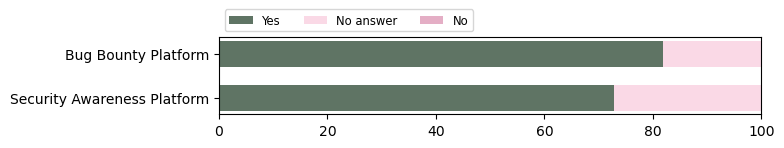

In [21]:
tools = ("Bug Bounty Platform", "Security Awareness Platform")
tools_counts = {
    'Yes': np.array([dataset["T129"].value_counts(normalize=True)[1.0], 
                    dataset["T130"].value_counts(normalize=True)[1.0]]),
    'No answer': np.array([dataset["T129"].value_counts(normalize=True)[2.0],
                    dataset["T130"].value_counts(normalize=True)[2.0]]),
    'No': np.array([0, 
                    0])
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots(figsize=(7, 1))
bottom = np.zeros(2)
ax.margins(x=0)
ax.invert_yaxis()
colorcount = 0
category_colors = ["#5F7464", "#FAD9E6", "#E4AEC5"]

for tool, tool_count in tools_counts.items():
    p = ax.barh(tools, tool_count*100, width, label=tool, left=bottom, color=category_colors[colorcount])
    colorcount = 0 if colorcount == 2 else colorcount+1
    bottom += tool_count*100

ax.legend(ncols=3, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

plt.savefig("soc_tools_sec.svg",bbox_inches='tight')
plt.show()

#### Identity Attestation

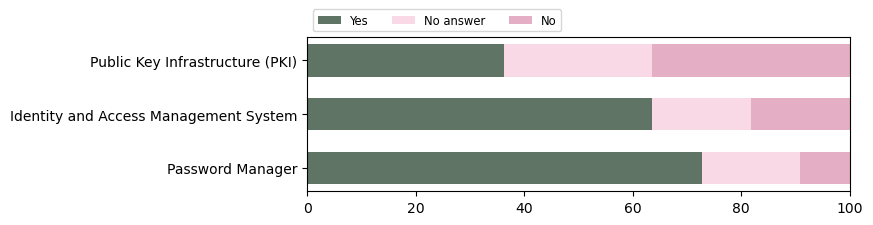

In [22]:
tools = ("Public Key Infrastructure (PKI)", "Identity and Access Management System", "Password Manager")
tools_counts = {
    'Yes': np.array([dataset["T132"].value_counts(normalize=True)[1.0], 
                    dataset["T133"].value_counts(normalize=True)[1.0],
                    dataset["T134"].value_counts(normalize=True)[1.0]]),
    'No answer': np.array([dataset["T132"].value_counts(normalize=True)[2.0],
                    dataset["T133"].value_counts(normalize=True)[2.0],
                    dataset["T134"].value_counts(normalize=True)[2.0]]),
    'No': np.array([dataset["T132"].value_counts(normalize=True)[3.0], 
                    dataset["T133"].value_counts(normalize=True)[3.0],
                    dataset["T134"].value_counts(normalize=True)[3.0]])
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots(figsize=(7, 2))
bottom = np.zeros(3)
ax.margins(x=0)
ax.invert_yaxis()
colorcount = 0
category_colors = ["#5F7464", "#FAD9E6", "#E4AEC5"]

for tool, tool_count in tools_counts.items():
    p = ax.barh(tools, tool_count*100, width, label=tool, left=bottom, color=category_colors[colorcount])
    colorcount = 0 if colorcount == 2 else colorcount+1
    bottom += tool_count*100

ax.legend(ncols=3, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

plt.savefig("soc_tools_id.svg",bbox_inches='tight')
plt.show()

#### Management

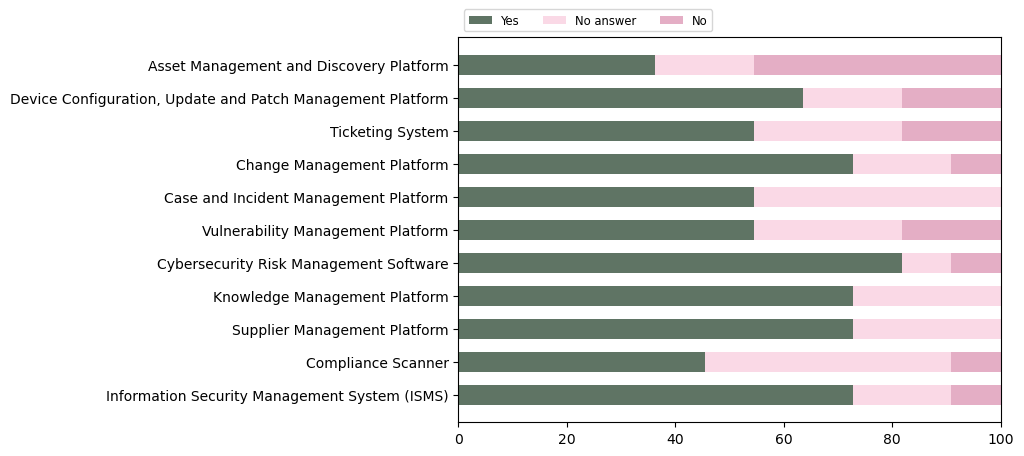

In [25]:
tools = ("Asset Management and Discovery Platform" , "Device Configuration, Update and Patch Management Platform" , "Ticketing System" , "Change Management Platform" , "Case and Incident Management Platform" , "Vulnerability Management Platform" , "Cybersecurity Risk Management Software" , "Knowledge Management Platform" , "Supplier Management Platform" , "Compliance Scanner" , "Information Security Management System (ISMS)")
tools_counts = {
    'Yes': np.array([dataset["T136"].value_counts(normalize=True)[1.0], 
                    dataset["T137"].value_counts(normalize=True)[1.0], 
                    dataset["T138"].value_counts(normalize=True)[1.0],  
                    dataset["T139"].value_counts(normalize=True)[1.0], 
                    dataset["T140"].value_counts(normalize=True)[1.0], 
                    dataset["T141"].value_counts(normalize=True)[1.0], 
                    dataset["T142"].value_counts(normalize=True)[1.0], 
                    dataset["T143"].value_counts(normalize=True)[1.0], 
                    dataset["T144"].value_counts(normalize=True)[1.0], 
                    dataset["T145"].value_counts(normalize=True)[1.0], 
                    dataset["T146"].value_counts(normalize=True)[1.0]]),
    'No answer': np.array([dataset["T136"].value_counts(normalize=True)[2.0], 
                    dataset["T137"].value_counts(normalize=True)[2.0], 
                    dataset["T138"].value_counts(normalize=True)[2.0], 
                    dataset["T139"].value_counts(normalize=True)[2.0], 
                    dataset["T140"].value_counts(normalize=True)[2.0], 
                    dataset["T141"].value_counts(normalize=True)[2.0], 
                    dataset["T142"].value_counts(normalize=True)[2.0], 
                    dataset["T143"].value_counts(normalize=True)[2.0], 
                    dataset["T144"].value_counts(normalize=True)[2.0], 
                    dataset["T145"].value_counts(normalize=True)[2.0], 
                    dataset["T146"].value_counts(normalize=True)[2.0]]),
    'No': np.array([dataset["T136"].value_counts(normalize=True)[3.0],
                    dataset["T137"].value_counts(normalize=True)[3.0], 
                    dataset["T138"].value_counts(normalize=True)[3.0], 
                    dataset["T139"].value_counts(normalize=True)[3.0], 
                    0, 
                    dataset["T141"].value_counts(normalize=True)[3.0],  
                    dataset["T142"].value_counts(normalize=True)[3.0], 
                    0, 
                    0, 
                    dataset["T145"].value_counts(normalize=True)[3.0], 
                    dataset["T146"].value_counts(normalize=True)[3.0]]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots(figsize=(7, 5))
bottom = np.zeros(11)
ax.margins(x=0)
ax.invert_yaxis()
colorcount = 0
category_colors = ["#5F7464", "#FAD9E6", "#E4AEC5"]

for tool, tool_count in tools_counts.items():
    p = ax.barh(tools, tool_count*100, width, label=tool, left=bottom, color=category_colors[colorcount])
    colorcount = 0 if colorcount == 2 else colorcount+1
    bottom += tool_count*100

ax.legend(ncols=3, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

plt.savefig("soc_tools_manag.svg",bbox_inches='tight')
plt.show()

### Missing Tools

In [24]:
tools_missing = dataset["T151_01"].value_counts()
tools_missing

Question 29 is not clearly formulated: the statement is not consistent (also compared to the others), so I was not sure how to answer it.    1
Spreadsheets ;)                                                                                                                              1
Name: T151_01, dtype: int64